# Business Problem

This project is made for Echo Park Automotive. They are a used car dealership. I have made a Decision Tree Regressor model. This model will process the data of used cars, their features, and their price. Aftrer learning the relationships between the details or features of the car and its selling price, it can begin to analize a car and predict its price. This has been created so that Echo Park Automotive can decide which cars to buy. If the model predicts a higher selling price than what is proposed on a prospective car, they should buy it and can flip the car. If the model predicts a lower selling price then what is proposed, then they should not buy the car.

# Data Understanding

Our Data was sourced from Kaggle (https://www.kaggle.com/datasets/rakkesharv/used-cars-detailed-dataset). It created by webscraping several used car sales websites. There are 973 entries with about 20 different features of each car. The target is the sales price and we are using the other features to predict the sales price. These features include :

Car_Name: The full name of the car which is displayed in the ad
Make: Maker of the Car
Model : Model of the Car
Make Year: Year of Manufacturing
Color : Color of the Car
Body Type : Body type of the car
Mileage Run: Total KMs the car run
No of Owners: Number of Previous Owners
Seating Capacity: Total Seating Capacity Available
Fuel Type: Fuel Type used by the car
Fuel Tank Capacity(L) : Total Fuel Capacity of the car
Engine Type : Engine Name, Model and Type
CC Displacement: Total Cubic Displacement
Transmission : Kind of Transmission
Transmission Type: Type of Transmission
Power(BHP) : Total Max Power
Torque(Nm) : Total Max Torque
Mileage(kmpl) : Average Mileage of the Car
Emission: Emission Norms of the Car
Price: Selling Price.

I am going to import certain packages from an open source data science platform called Anaconda. These packages will give me the tools I need to understand, prepare, and model the data.

In [243]:
import numpy as np
import scipy.stats as stats
import sklearn
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor as dr

Now lets take the data, which is a csv file, and turn it into a data frame by using an import called pandas.

In [244]:
df = pd.read_csv('data/archive/FINAL_SPINNY_900.csv')

I have created the datframe. Let's use a method 'head' to display the first 5 data entries.

In [245]:
df.head()

,Car_Name,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(L),Engine_Type,CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price
0,Volkswagen Ameo [2016-2017] Highline 1.5L AT (D),Volkswagen,Ameo,2017,silver,sedan,44611,1st,5,diesel,45,1.5L TDI Engine,1498,7-Speed,Automatic,109.00,250.00,21.66,BS IV,"6,57,000"
1,Hyundai i20 Active [2015-2020] 1.2 SX,Hyundai,i20 Active,2016,red,crossover,20305,1st,5,petrol,45,1.2L Kappa 5 Speed Manual Transmission,1197,5-Speed,Manual,82.00,115.00,17.19,BS V,"6,82,000"
2,Honda WR-V VX i-VTEC,Honda,WR-V,2019,white,suv,29540,2nd,5,petrol,40,i-VTEC Petrol engine,1199,5-Speed,Manual,88.50,110.00,16.50,BS IV,"7,93,000"
3,Renault Kwid 1.0 RXT AMT,Renault,Kwid,2017,bronze,hatchback,35680,1st,5,petrol,28,1.0L,999,5-Speed,Manual,67.00,91.00,21.70,BS IV,"4,14,000"
4,Hyundai Grand i10 [2017-2020] Asta 1.2 Kappa VTVT,Hyundai,Grand i10,2017,orange,hatchback,25126,1st,5,petrol,43,Kappa VTVT Petrol Engine,1197,5-Speed,Manual,81.86,113.75,18.90,BS V,"5,15,000"


Okay now we have an idea of how the data-frame looks. Lets see what type of data columns we have.

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Car_Name               973 non-null    object 
 1   Make                   973 non-null    object 
 2   Model                  973 non-null    object 
 3   Make_Year              973 non-null    int64  
 4   Color                  973 non-null    object 
 5   Body_Type              973 non-null    object 
 6   Mileage_Run            973 non-null    int64  
 7   No_of_Owners           973 non-null    object 
 8   Seating_Capacity       973 non-null    int64  
 9   Fuel_Type              973 non-null    object 
 10  Fuel_Tank_Capacity(L)  973 non-null    int64  
 11  Engine_Type            973 non-null    object 
 12  CC_Displacement        973 non-null    int64  
 13  Transmission           973 non-null    object 
 14  Transmission_Type      973 non-null    object 
 15  Power(

Some of these string objects can be converted into intergers by removing commas. This will make for better processing. Lets take a look at 'Emissions' for example. The roman numerals can be converted to values. Lets first make sure that they are all roman numerals by using a method called value counts.

In [247]:
df["Emission"].value_counts()

BS IV     588
BS V      303
BS III     82
Name: Emission, dtype: int64

In [248]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Looking at the organization of my files with ls

In [249]:
ls


 data/                         README.md
'Optimizing Used Cars-1.pdf'  'Used Car Pricing Notebook.ipynb'


Loading in the data file as a data frame with pandas

In [250]:
df = pd.read_csv('data/archive/FINAL_SPINNY_900.csv')

Looking at a preview of the data

In [251]:
df.head()

,Car_Name,Make,Model,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(L),Engine_Type,CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price
0,Volkswagen Ameo [2016-2017] Highline 1.5L AT (D),Volkswagen,Ameo,2017,silver,sedan,44611,1st,5,diesel,45,1.5L TDI Engine,1498,7-Speed,Automatic,109.00,250.00,21.66,BS IV,"6,57,000"
1,Hyundai i20 Active [2015-2020] 1.2 SX,Hyundai,i20 Active,2016,red,crossover,20305,1st,5,petrol,45,1.2L Kappa 5 Speed Manual Transmission,1197,5-Speed,Manual,82.00,115.00,17.19,BS V,"6,82,000"
2,Honda WR-V VX i-VTEC,Honda,WR-V,2019,white,suv,29540,2nd,5,petrol,40,i-VTEC Petrol engine,1199,5-Speed,Manual,88.50,110.00,16.50,BS IV,"7,93,000"
3,Renault Kwid 1.0 RXT AMT,Renault,Kwid,2017,bronze,hatchback,35680,1st,5,petrol,28,1.0L,999,5-Speed,Manual,67.00,91.00,21.70,BS IV,"4,14,000"
4,Hyundai Grand i10 [2017-2020] Asta 1.2 Kappa VTVT,Hyundai,Grand i10,2017,orange,hatchback,25126,1st,5,petrol,43,Kappa VTVT Petrol Engine,1197,5-Speed,Manual,81.86,113.75,18.90,BS V,"5,15,000"


### Making Numbers Where We Can

Looking at Emission values to potentialy change the to numerical values (int)

In [252]:
df["Emission"].value_counts()

BS IV     588
BS V      303
BS III     82
Name: Emission, dtype: int64

Simple enough we can change those to 3,4, and 5. Now lets look at price since that could easily be numbers. Let's look at all of the values by calling a method 'Values' instead of value counts.

In [253]:
df['Price'].values

array(['6,57,000', '6,82,000', '7,93,000', '4,14,000', '5,15,000',
       '6,04,000', '3,16,000', '14,19,000', '7,10,000', '3,92,000',
       '6,13,000', '5,98,000', '9,69,000', '21,00,000', '6,66,000',
       '10,39,000', '8,58,000', '8,60,000', '6,80,000', '6,25,000',
       '5,67,000', '3,71,000', '10,76,000', '5,87,000', '3,96,000',
       '5,54,000', '9,84,000', '5,07,000', '5,86,000', '6,39,000',
       '2,37,000', '5,36,000', '4,56,000', '11,07,000', '5,71,000',
       '5,87,000', '6,29,000', '7,18,000', '3,96,000', '8,77,000',
       '7,74,000', '5,54,000', '8,29,000', '5,30,000', '3,67,000',
       '5,50,000', '6,60,000', '9,98,000', '10,12,000', '15,37,000',
       '9,08,000', '5,08,000', '4,17,000', '7,25,000', '9,80,000',
       '7,96,000', '4,35,000', '5,54,000', '4,81,000', '4,42,000',
       '5,30,000', '7,59,000', '4,55,000', '19,72,000', '11,38,000',
       '9,20,000', '17,42,000', '5,68,000', '4,19,000', '4,76,000',
       '5,77,000', '5,41,000', '7,30,000', '18,75,00

Im going to change do the string to interger or float conversion to all of the columns I feel are good candidates to change. I am using the replace method to remove the elements that would cause these values to be a string. Next, I will call on a method 'astype' where I can tell the computer what kind of data type I want the selected values to be.

In [254]:
df['Price'] = df['Price'].str.replace(",","")

Removiving 'BS' from the values in Emission columns and converting roman numerals to interger values for
the same purpose.

In [255]:
df['Emission'] = df['Emission'].str.replace("BS","")

In [256]:
df['Emission'] = df['Emission'].str.replace("IV", "4")

In [257]:
df['Emission'] = df['Emission'].str.replace("III", "3")

In [258]:
df['Emission'] = df['Emission'].str.replace("V", "5")

In [259]:
df['No_of_Owners'] = df['No_of_Owners'].str.replace("1st", "0")

In [260]:
df['No_of_Owners'] = df['No_of_Owners'].str.replace("2nd", "1")

In [261]:
df['No_of_Owners'] = df['No_of_Owners'].str.replace("3rd", "2")

Telling the computer that the following columns are int or float

In [262]:
df['Emission'] = df['Emission'].astype(int)

In [263]:
df['Price'] = df['Price'].astype(int)

In [264]:
df['Mileage(kmpl)'] = df['Mileage(kmpl)'].astype(float)

In [265]:
df["No_of_Owners"] = df['No_of_Owners'].astype(int)

Now lets take a look at the difference for a sanity check.

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Car_Name               973 non-null    object 
 1   Make                   973 non-null    object 
 2   Model                  973 non-null    object 
 3   Make_Year              973 non-null    int64  
 4   Color                  973 non-null    object 
 5   Body_Type              973 non-null    object 
 6   Mileage_Run            973 non-null    int64  
 7   No_of_Owners           973 non-null    int64  
 8   Seating_Capacity       973 non-null    int64  
 9   Fuel_Type              973 non-null    object 
 10  Fuel_Tank_Capacity(L)  973 non-null    int64  
 11  Engine_Type            973 non-null    object 
 12  CC_Displacement        973 non-null    int64  
 13  Transmission           973 non-null    object 
 14  Transmission_Type      973 non-null    object 
 15  Power(

### Dropping Overbearing Columns

Okay, so I have eight object columns left. That is too many for my analysis. This is because I will make the identification of the objects a true false statement (Binary) so that the model can compute their relationship to the data. This will create many more columns. 

Let's take a look at all of the object coluns to analyze their necessity and decide which ones to keep.

In [267]:
df['Car_Name'].value_counts().head()

MG Motors Hector 2.0 Sharp                    24
Toyota Yaris [2018-2021] VX CVT               16
Hyundai Elite i20 [2014-2018] Sportz 1.2      13
Ford Figo [2019-2021] Titanium Diesel         13
Hyundai Creta [2015-2018] 1.6 SX Plus Auto    12
Name: Car_Name, dtype: int64

In [268]:
df['Make'].value_counts()

Hyundai          305
Maruti Suzuki    291
Honda             73
Renault           68
Ford              52
Toyota            50
MG Motors         35
Volkswagen        29
Tata              23
Mahindra          18
Kia                8
Chevrolet          6
Skoda              4
Jeep               4
Nissan             4
Datsun             3
Name: Make, dtype: int64

In [269]:
df['Model'].value_counts()

Elite i20       64
Baleno          36
i10             36
Grand i10       35
Hector          34
                ..
Redi-GO          1
Scala            1
TUV300           1
Micra Active     1
Alto             1
Name: Model, Length: 87, dtype: int64

In [270]:
df['Color']

0      silver
1         red
2       white
3      bronze
4      orange
        ...  
968     white
969     white
970    silver
971     white
972    silver
Name: Color, Length: 973, dtype: object

In [271]:
df['Body_Type'].value_counts()

hatchback    482
sedan        226
suv          206
muv           38
crossover     21
Name: Body_Type, dtype: int64

In [272]:
df['Fuel_Type'].value_counts()

petrol        783
diesel        188
petrol+cng      2
Name: Fuel_Type, dtype: int64

In [273]:
df['Transmission_Type'].value_counts()

Manual       711
Automatic    262
Name: Transmission_Type, dtype: int64

In [274]:
df['Engine_Type'].value_counts()

Kappa VTVT Petrol Engine              77
Petrol Engine                         45
K10B                                  38
FWD                                   35
1.2L VVT Engine                       34
                                      ..
1.5L TDI Engine                        1
2.0-Litre 4-Cyl Multijet II Engine     1
1.0 XSDE                               1
dCi Diesel with VGT                    1
1.4L GDi Turbo Petrol                  1
Name: Engine_Type, Length: 137, dtype: int64

Independant Learning from getjerry.com (its a car-financing website) “Color generally doesn't have an impact on the price of buying a new vehicle. However, in-demand colors like white, grey, and silver may be widely available and easier to purchase than those with unique colors. More popular colors will also hold better resale value over time since there is more demand for them.

It is apparant that the column 'Car Name' has descriptions that are in other columns. That leads me to decide that it is unecessary for the model. So I am going to remove that column by calling on the .drop method. I am also going to remove the 'Color' column. This is because of the independant learning I have completed. I am assuming that the color of the car does not have the kidn of relationship with the target value that we need to calculate. I am also going to drop the model, the make, the engine type. This is because they have too many values and would add 200 columns to my data frame and that would disrupt the model. 

In [319]:
df = df.drop(columns=['Color', 'Car_Name', 'Model', 'Make', 'Engine_Type'], axis=1)

KeyError: "['Color' 'Car_Name' 'Model' 'Make' 'Engine_Type'] not found in axis"

Now looking at the data-frame for a sanity check to make sure I dropped the columns

In [320]:
df

,Make_Year,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(L),CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission,Price
0,2017,sedan,44611,0,5,diesel,45,1498,7-Speed,Automatic,109.00,250.00,21.66,4,657000
1,2016,crossover,20305,0,5,petrol,45,1197,5-Speed,Manual,82.00,115.00,17.19,5,682000
2,2019,suv,29540,1,5,petrol,40,1199,5-Speed,Manual,88.50,110.00,16.50,4,793000
3,2017,hatchback,35680,0,5,petrol,28,999,5-Speed,Manual,67.00,91.00,21.70,4,414000
4,2017,hatchback,25126,0,5,petrol,43,1197,5-Speed,Manual,81.86,113.75,18.90,5,515000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,2018,sedan,23869,0,5,petrol,43,1591,6-Speed,Automatic,121.00,158.00,17.40,5,956000
969,2019,sedan,14831,0,5,petrol,43,1591,6-Speed,Automatic,121.00,158.00,17.40,5,1027000
970,2014,sedan,52846,0,5,petrol,43,1591,4-Speed,Automatic,121.00,158.00,17.01,3,736000
971,2020,crossover,28335,1,5,diesel,42,1499,5-Speed,Automatic,98.96,215.00,18.50,5,749000


Now lets see how many features we have left

In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Make_Year              973 non-null    int64  
 1   Body_Type              973 non-null    object 
 2   Mileage_Run            973 non-null    int64  
 3   No_of_Owners           973 non-null    int64  
 4   Seating_Capacity       973 non-null    int64  
 5   Fuel_Type              973 non-null    object 
 6   Fuel_Tank_Capacity(L)  973 non-null    int64  
 7   CC_Displacement        973 non-null    int64  
 8   Transmission           973 non-null    object 
 9   Transmission_Type      973 non-null    object 
 10  Power(BHP)             973 non-null    float64
 11  Torque(Nm)             973 non-null    float64
 12  Mileage(kmpl)          973 non-null    float64
 13  Emission               973 non-null    int64  
 14  Price                  973 non-null    int64  
dtypes: flo

### Individual Analysis of each features relationship with the target.

We have 15 including our target value. Let's look at the relationship between the features and our target value. I am going to do this by making an individual graph of each feature and the target value.

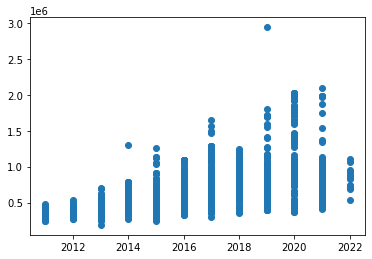

In [322]:
x = df['Make_Year']
y=df['Price']
plt.scatter(x,y)

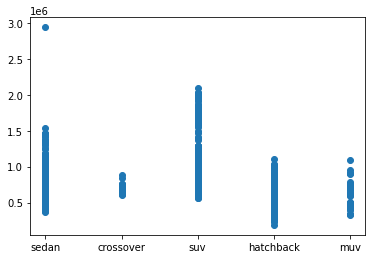

In [323]:
x = df['Body_Type']
y=df['Price']
plt.scatter(x,y)

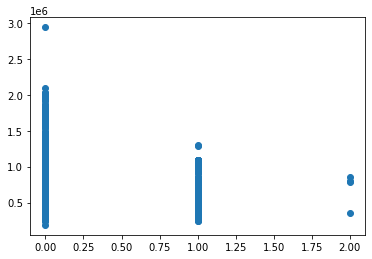

In [324]:
x = df['No_of_Owners']
y=df['Price']
plt.scatter(x,y)

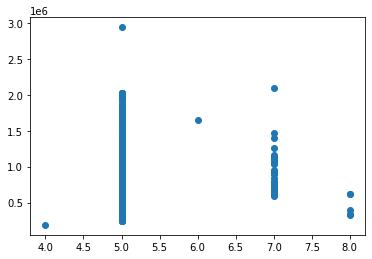

In [325]:
x = df['Seating_Capacity']
y=df['Price']
plt.scatter(x,y)

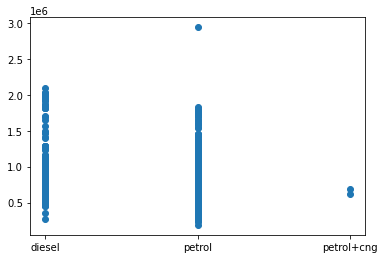

In [326]:
x = df['Fuel_Type']
y=df['Price']
plt.scatter(x,y)

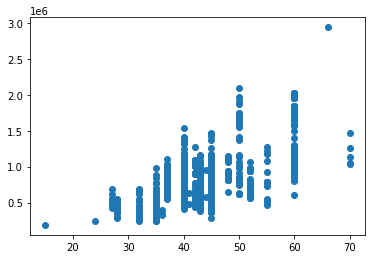

In [327]:
x = df['Fuel_Tank_Capacity(L)']
y=df['Price']
plt.scatter(x,y)

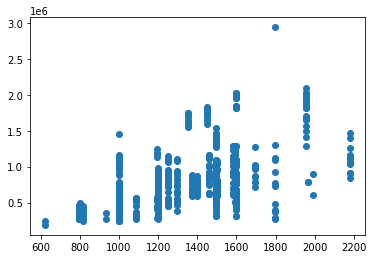

In [328]:
x = df['CC_Displacement']
y=df['Price']
plt.scatter(x,y)

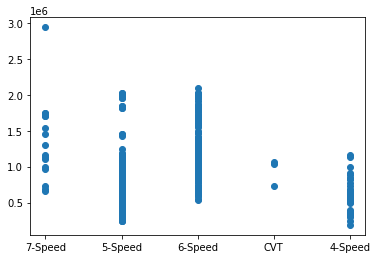

In [329]:
x = df['Transmission']
y=df['Price']
plt.scatter(x,y)

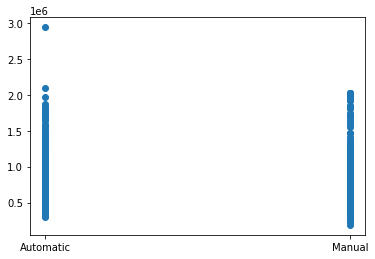

In [330]:
x = df['Transmission_Type']
y=df['Price']
plt.scatter(x,y)

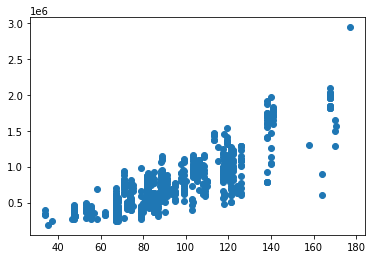

In [331]:
x = df['Power(BHP)']
y=df['Price']
plt.scatter(x,y)

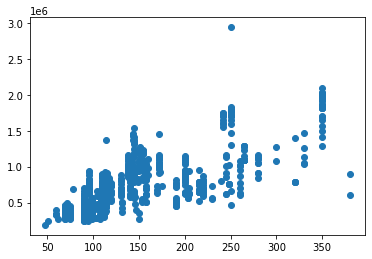

In [332]:
x = df['Torque(Nm)']
y=df['Price']
plt.scatter(x,y)

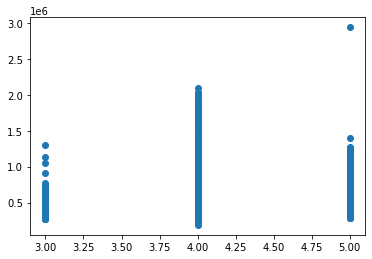

In [333]:
x = df['Emission']
y=df['Price']
plt.scatter(x,y)

As you can see, many of the features have a linear relationship with the model. But a few don't. While it would be more simple to drop the features that aren't linear to make a linear regression model, I want my model to be very accurate and incorporate those features. So I am going to mess around and see which kind of modeling scores best.

# Modeling

Now we will split the data using an import from sklearn call 'train, test, split'. This will split the data in way so that we can use the majority of it to select, and train our model. Then, when we have developed our final model, we will use the testing data to see how accurately it can predict the target value which in this case is the price. The first step is to isolate the target variable from the data frame.

In [334]:
X = df.drop('Price',axis=1)
y = df['Price']

In [335]:
X_train, X_test, y_train, y_test = train_test_split(
                                                X,
                                                y,
                                                test_size=0.2,
                                                random_state=42)

In [336]:
X_train

,Make_Year,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Fuel_Tank_Capacity(L),CC_Displacement,Transmission,Transmission_Type,Power(BHP),Torque(Nm),Mileage(kmpl),Emission
967,2017,sedan,33258,0,5,petrol,37,1197,5-Speed,Automatic,88.50,113.00,23.26,5
365,2016,suv,97039,0,5,diesel,60,1582,6-Speed,Manual,126.00,265.00,17.01,4
559,2020,suv,13185,0,5,diesel,60,1596,5-Speed,Manual,167.68,350.00,17.41,4
33,2021,hatchback,13389,0,5,petrol,37,998,7-Speed,Automatic,118.00,172.00,20.20,4
31,2013,sedan,10651,0,5,petrol,35,1198,5-Speed,Manual,86.90,109.00,18.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2014,sedan,68269,1,5,petrol,55,1598,5-Speed,Manual,103.20,153.00,16.09,3
270,2021,hatchback,27185,0,5,petrol,37,1197,5-Speed,Manual,81.86,113.75,20.07,4
860,2019,suv,73732,0,5,diesel,40,1498,6-Speed,Manual,97.89,200.00,23.70,4
435,2011,hatchback,49985,0,5,petrol,35,1197,5-Speed,Manual,68.00,99.08,19.81,3


In [337]:
df['Fuel_Type'].value_counts()

petrol        783
diesel        188
petrol+cng      2
Name: Fuel_Type, dtype: int64

### Dummy Model

Now let's apply a dummy regressor to see our baseline. In other words, a sort of 'floor' to compare to see how much were solving for with our modeling. I imported the dummy regressor as DR for an abbreviate.

In [338]:
dr1 = dr()

In [339]:
dr1.fit(X_train,y_train)

DummyRegressor()

In [340]:
dr1.score(X_train,y_train)

0.0

We can see that our dummy model esentially doesn't solve anything because we havent built the right model for the data.

### Piping

Now I am going to do something called Piping. this is where in wrapp up certain proceadures like StandardScaler and OneHotEncoder. StandardScaler will scale all of my numeric values so that they can be properly compared to eachother to asses their impact on the target value. OneHotEncoder will turn all of my categorical values into binary columns. This will allow them to be scaled with the other values for the computation. It is like scaling for objects.

In [341]:
pipe = Pipeline(steps=[('ss', StandardScaler())])

In [342]:
pipe_2 = Pipeline(steps=[('ohe', OneHotEncoder(sparse=False))])

Here when I set up my pipe to work on columns, I assigned the 'pipe' that I want and after that I assigned the columns I want the pipe to transform with an array as the last argument. The array tells the transformer which columnsto transform.

In [343]:
CT = ColumnTransformer(transformers=[('pipe', pipe,[0,2,3,4,6,7,10,11,12,13]),
                                         ('pipe_2',pipe_2,[1,5,8,9])],
                           remainder='drop')

Now I am going to create one last pipe, which will incorporate my Transformer, and my model into one pipe. Let's start off a linear regression to see how that scores.

In [344]:
lr_ct_pipe = Pipeline(steps=[('ct', CT),
                            ('dtr', LinearRegression())])

In [345]:
lr_ct_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('pipe',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  [0, 2, 3, 4, 6, 7, 10, 11, 12,
                                                   13]),
                                                 ('pipe_2',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  [1, 5, 8, 9])])),
                ('dtr', LinearRegression())])

In [346]:
lr_ct_pipe.score(X_train,y_train)

0.8810267274425316

Okay not bad, lets try this with a Decision Tree Regressor and see how that one performs.

In [347]:
dtr_ct_pipe = Pipeline(steps=[('ct', CT),
                            ('dtr', DecisionTreeRegressor())])

In [348]:
dtr_ct_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('pipe',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  [0, 2, 3, 4, 6, 7, 10, 11, 12,
                                                   13]),
                                                 ('pipe_2',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  [1, 5, 8, 9])])),
                ('dtr', DecisionTreeRegressor())])

In [349]:
dtr_ct_pipe.score(X_train, y_train)

1.0

### Grid

While our model may be over fit, it certainly is a much better score. Let's run it through a grid to find our best parameters for the decision tree regressor.

A grid runs the model with all of the parameter options that I create. It will then tell me which combination of parameter options score the best.

I am going to use the criterion you see below, because there are only four I know of that are commonly used. So why not test them all. The splitter option which decides at which nodes the decision tree should split, is most commonly either best or random so I thought I would make both an option and see which one is better. From my intuition I believe that 5 will be the best amount of minimum samples to split. Thats essentialy how deap the tree goes. But I could be either to high or too low with that estimation. So (no punn intended) I am going to go two up and two down as my other opens and see which one performs the best. 

In [350]:
grid = {'dtr__criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'dtr__splitter' : ['best', 'random'], 'dtr__min_samples_split' : [3,5,7]  }

In [351]:
gs= GridSearchCV(dtr_ct_pipe, grid, verbose=3, n_jobs=-2)

In [352]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done   2 tasks      | elapsed:    1.4s


ValueError: Found unknown categories ['petrol+cng'] in column 1 during transform

While our model may be over fit, it certainly is a much better score. Let's run it through a grid to find our best parameters for the decision tree regressor.

re-organize the index column for the dataframe

In [ ]:
dddddf.drop('Price', axis=1,inplace=True)

In [ ]:
# Here we are resetting the index of our price Dataframe to  adjust for standard scaler!
df_price = df_price.reset_index(drop=True)

In [ ]:
df_price

Calling on the data frame to look at it

In [ ]:
df

In [ ]:
df.info()

Instantiating the Standar Scaler and fitting our Data Frame to it

In [ ]:
# Instantiating our StandardScalar Object
ss = StandardScaler()

ss.fit(df)

df_scaled = ss.transform(df)

In [ ]:
# Turning our StandardScalar object back into a dataframe, with the same column names as before 
df_scaled_new = pd.DataFrame(df_scaled, columns=df.columns)

In [ ]:
df_scaled_new

Combining hte data frame of our categorical variables back into the data frame after turning them into T/F (1/0) Values

In [ ]:
df1 = pd.concat([df_scaled_new,df_dummy, df_price], axis = 1)

Calling on the new dataframe we have created to make sure everything looks good

In [ ]:
df1

Creating variables for target feature and the data frame of other features in preparation for splitting
the data between training data and testing data

In [ ]:
X = df1.drop('Price',axis=1)
y = df1['Price']

Splitting the data so that i have data to train the model and data to test the model with

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                                X,
                                                y,
                                                test_size=0.2,
                                                random_state=42)

Creating a linear regression model, fitting it with training data and testing it with a program and
cross validating it.

In [ ]:
lr = LinearRegression()
scores_lr = cross_validate(
                    lr, X_train, y_train, cv=5, 
                    return_train_score=True)
print(f"""train scores: {scores_lr['train_score']},
      test scores {scores_lr['test_score']}""")

Creating a decision tree regression model, fitting it with training data and testing it with a program and
cross validating it to see if it performs better

In [ ]:
dtr = DecisionTreeRegressor()
scores_dtr = cross_validate(
                    dtr, X_train, y_train, cv=5, 
                    return_train_score=True)
print(f"""train scores: {scores_dtr['train_score']},
      test scores: {scores_dtr['test_score']}""")

I have decided to use a decision tree regressor model since it has performed better on the cross validation. 
Now i am making a dummy model that just uses the mean values to see my improvement in the model that i create

In [ ]:
dr1 = dr()

In [ ]:
dr1.fit(X_train, y_train)

getting the R^2 score of the dummy model on the training data

In [ ]:
dr1.score(X_train,y_train)

Looking at the dummy regressors predictions to make sure that it worked

In [ ]:
dr1.predict(X_train)

Getting a preformace score with the dummy model to analyze the improvement of my modeling

In [ ]:
dr1.score(X_train,y_train)

Creating my grid, which are the different options i can implement as my parameters for my DecisionTree Regressor
Model.

In [ ]:
grid = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'splitter' : ['best', 'random'], 'min_samples_split' : [2,5,7]  }

Performing a GridSearch. The computer is running the data through a decision tree model with every possible combination of the grid parameters. It will also cross validate each time and return the parameters that create the best score.

In [ ]:
gs= GridSearchCV(dtr, grid, verbose=3, n_jobs=-2)

In [ ]:
gs.fit(X_train,y_train)

Here I pull the best parameters from the Grid Search

In [ ]:
gs.best_params_

Creating a Model with the best parameters that I pulled from the grid search

In [ ]:
best_dtr = DecisionTreeRegressor(criterion= 'friedman_mse', min_samples_split =  7, splitter= 'best')

Cross Validating this model to see the improvement from the baseline model

In [ ]:
scores_best_dtr = cross_validate(
                    best_dtr, X_train, y_train, cv=5, 
                    return_train_score=True)
print(f"""train scores: {scores_best_dtr['train_score']},
      test scores: {scores_best_dtr['test_score']}""")

Fitting the training data to my new model

In [ ]:
best_dtr.fit(X_train,y_train)

In [ ]:
best_dtr.feature_importances_

Predicting the sales price of the cars in the test set

In [ ]:
y_pred = best_dtr.predict(X_test)
y_pred

Scoring my final model on the testing data

In [ ]:
best_dtr.score(X_test,y_test)

I am using the model above because 1. the grid search found the best parameters, and 2. because it has the highest R^2 score. This model will most accuratley predict the sales price of the car. The whole point of my project is to predict prices of used cars and find opportunities to buy them for lower than their ppredicted price. I am going to use the model in the line above that I named "best_dtr" because it has proven through scoring and a grid search that it can best predict the price of the car.

Comparing the predicted prices with the actual sales prices of the cars in our test set

In [ ]:
Comparison_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred, 'Percentage Difference':abs(y_test-y_pred)/y_test * 100})
Comparison_df.tail()

In [ ]:
sub_comps = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred, ' Difference':y_pred-y_test})
sub_comps.tail()

Looking at the average difference in percetange of the predicted vs actual value of the sales price.

In [ ]:
sum(Comparison_df['Percentage Difference'].values)/len(Comparison_df['Percentage Difference'].values)

scattering cars index and their price, while plotting the predicted price over them

In [ ]:
X_test.index

creating a scatter plot where the x axis is the predicted price and the y axis is the actual price data of the testing set.
I also added a best line of fit to show the accuracy

In [ ]:
x=best_dtr.predict(X_test) 
y=y_test
a, b = np.polyfit(x, y, 1)
plt.scatter(x, y, color = 'red')
plt.plot(x, a*x+b)
plt.title('Prediction vs Actual')
plt.xlabel('Prediction')
plt.ylabel('y_test Value')
plt.show()